In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import glob

In [2]:
combined_data = glob.glob("Data/IceCube 2008-2018 double counting corrected/*.csv")

for data_file in combined_data:
    data = pd.read_csv(data_file, sep=r'\s+')
    try:
        all_data = pd.concat([all_data, data], ignore_index=True)
    except NameError:
        all_data = data

In [3]:
all_data

,#,MJD[days],log10(E/GeV),AngErr[deg],RA[deg],Dec[deg],Azimuth[deg],Zenith[deg]
0,54562.379113,3.31,0.48,203.024,16.760,218.374,106.712,NaN
1,54562.386622,5.17,0.62,75.024,-13.371,349.100,76.646,NaN
2,54562.387892,3.92,0.56,97.501,11.290,327.060,101.291,NaN
3,54562.392677,5.57,1.13,305.857,-33.932,120.413,56.090,NaN
4,54562.404776,5.80,1.11,143.516,-38.279,287.171,51.684,NaN
...,...,...,...,...,...,...,...,...
1134426,58307.961110,5.14,0.20,221.246,-59.959,141.239,29.956,NaN
1134427,58307.962666,2.94,1.23,191.547,4.415,171.627,94.312,NaN
1134428,58307.963556,2.88,0.30,308.127,42.543,55.437,132.606,NaN
1134429,58307.963972,2.98,0.21,332.199,44.720,31.489,134.811,NaN


In [5]:
# All the columns are shifted one to the right, so need to 
# correct for that

logE = np.array(all_data['MJD[days]'])
RA = np.array(all_data['AngErr[deg]'])
Dec = np.array(all_data['RA[deg]'])

# # Since RA is given in [0, 360] degrees, need to convert to [-180, 180] degrees
# for i in range(len(RA)):
#     if RA[i] > 180:
#         RA[i] = RA[i] - 360

In [9]:
# Creating a 2D grid to store the counts in each 1x1 degree bin

grid = np.zeros((360, 180))

for i in range(len(RA)):
    ra_idx = int(np.floor(RA[i]))
    if ra_idx == 360:
        ra_idx = 0
    dec_idx = int(np.floor(Dec[i] + 90))
    grid[ra_idx, dec_idx] += 1



In [12]:
plot_RA = []

for i in range(0, 181):
    count = 0
    while count < 180:
        plot_RA.append(i)
        count += 1

for i in range(-179, 0):
    count = 0
    while count < 180:
        plot_RA.append(i)
        count += 1

plot_RA = np.array(plot_RA)


plot_Dec = []

count = 0
while count < 360:
    for i in range(-90, 90):
        plot_Dec.append(i)
    count += 1

plot_Dec = np.array(plot_Dec)

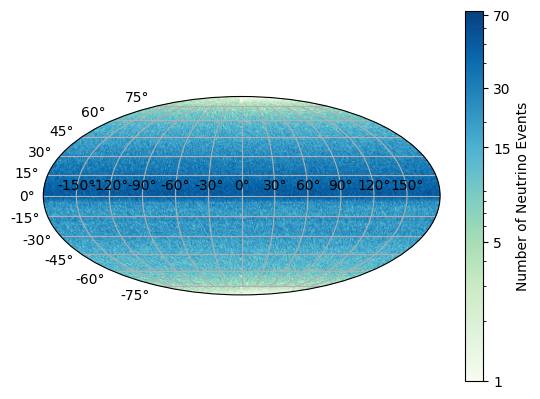

In [22]:
# Plotting a skymap 

plt.figure()
plt.subplot(projection='mollweide')
plt.scatter(np.radians(plot_RA), np.radians(plot_Dec), c=grid.flatten(), cmap='GnBu', s=1, norm='log')
plt.grid(True)

plt.colorbar(label='Number of Neutrino Events').set_ticks([1, 5, 15, 30, 70], labels=['1', '5', '15', '30', '70'])

plt.show()